In [17]:
import pandas as pd
file_path = '/content/dress_patterns.csv'
data = pd.read_csv(file_path)
print(data.head())

    _unit_id   category  category:confidence  \
0  851505458       ikat               0.3487   
1  851505459      plain               1.0000   
2  851505460  polka dot               0.6709   
3  851505461      plain               1.0000   
4  851505462   geometry               0.7035   

                                           image_url  
0  http://s3-eu-west-1.amazonaws.com/we-attribute...  
1  http://s3-eu-west-1.amazonaws.com/we-attribute...  
2  http://s3-eu-west-1.amazonaws.com/we-attribute...  
3  http://s3-eu-west-1.amazonaws.com/we-attribute...  
4  http://s3-eu-west-1.amazonaws.com/we-attribute...  


In [18]:
# Checking for missing values
data.isnull().sum()
# Filling missing values
data.fillna(method='ffill', inplace=True)
print(data.head())

    _unit_id   category  category:confidence  \
0  851505458       ikat               0.3487   
1  851505459      plain               1.0000   
2  851505460  polka dot               0.6709   
3  851505461      plain               1.0000   
4  851505462   geometry               0.7035   

                                           image_url  
0  http://s3-eu-west-1.amazonaws.com/we-attribute...  
1  http://s3-eu-west-1.amazonaws.com/we-attribute...  
2  http://s3-eu-west-1.amazonaws.com/we-attribute...  
3  http://s3-eu-west-1.amazonaws.com/we-attribute...  
4  http://s3-eu-west-1.amazonaws.com/we-attribute...  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


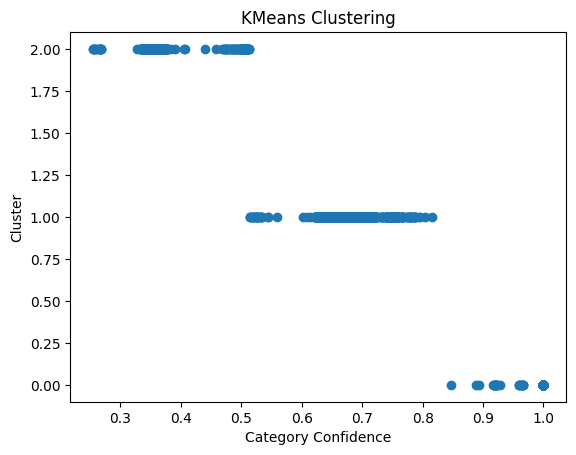

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = data[['category:confidence']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)
plt.scatter(data['category:confidence'], data['cluster'])
plt.xlabel('Category Confidence')
plt.ylabel('Cluster')
plt.title('KMeans Clustering')
plt.show()

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#sample data
text_data = ["Fashion blog post about summer trends", "New collection release on social media"]

#data into a matrix
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(text_data)

# Transform the count matrix to a normalized tf-idf representation
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.toarray())

[[0.40824829 0.40824829 0.         0.40824829 0.         0.
  0.         0.40824829 0.         0.         0.40824829 0.40824829]
 [0.         0.         0.40824829 0.         0.40824829 0.40824829
  0.40824829 0.         0.40824829 0.40824829 0.         0.        ]]


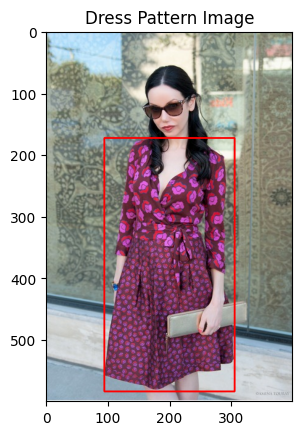

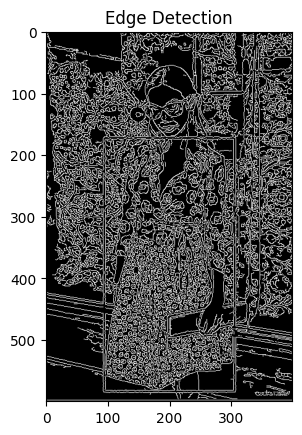

In [23]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_url = data['image_url'][0]
response = requests.get(image_url)
image_data = np.frombuffer(response.content, np.uint8)
image = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
if image is not None:

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Dress Pattern Image')
    plt.show()

    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply edge detection
    edges = cv2.Canny(gray_image, threshold1=30, threshold2=100)

    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.show()
else:
    print("Error: Unable to load image.")
